<a href="https://colab.research.google.com/github/sayan0506/Deep-Neural-Network-with-Pytorch-/blob/main/Pytorch_practice_materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float32)

In [ ]:
a

tensor([1., 2., 3.])

In [ ]:
a[0].item()

1.0

In [ ]:
# let's implement the concept of partial derivative

In [ ]:
# converting the pytorch tensor to numpy array
a.numpy()

array([1., 2., 3.], dtype=float32)

In [ ]:
a.ndimension()

1

In [ ]:
b = a.view(-1,1)

In [ ]:
b.ndimension()

2

In [ ]:
b.numpy()

array([[1.],
       [2.],
       [3.]], dtype=float32)

In [ ]:
b*b

tensor([[1.],
        [4.],
        [9.]])

In [ ]:
torch.dot(a,a.T)

tensor(14.)

In [ ]:
ls = a.tolist()

In [ ]:
ls

[1.0, 2.0, 3.0]

In [ ]:
# using linspace in pytorch
c = torch.linspace(-2,2,steps = 5, dtype = torch.float32)

In [ ]:
c

tensor([-2., -1.,  0.,  1.,  2.])

In [ ]:
c.type()

'torch.FloatTensor'

In [ ]:
c = c.type(torch.IntTensor)

In [ ]:
c.type()

'torch.IntTensor'

In [ ]:
c

tensor([-2, -1,  0,  1,  2], dtype=torch.int32)

In [ ]:
x = torch.tensor(2, dtype=torch.float32, requires_grad=True)

In [ ]:
z = x*x + 2*x + 1

In [ ]:
z.backward()

In [ ]:
x.grad

tensor(6.)

In [ ]:
z

tensor(9., grad_fn=<AddBackward0>)

In [ ]:
x.grad_fn

In [ ]:
x

tensor(2., requires_grad=True)

In [ ]:
print(x.grad_fn)

None


In [ ]:
x

tensor(2., requires_grad=True)

In [ ]:
mean = torch.mean(x)

In [ ]:
mean

tensor(2., grad_fn=<MeanBackward0>)

In [ ]:
torch.std(x)

tensor(nan, grad_fn=<StdBackward0>)

In [ ]:
torch.sin(x)

tensor(0.9093, grad_fn=<SinBackward>)

In [ ]:
n = torch.sin(x)

In [ ]:
# as we passed req_grad = True in case of x, so we can't 
n.detach().numpy()

array(0.9092974, dtype=float32)

In [ ]:
import torch
from torch.utils.data import Dataset

In [ ]:
# defining class for dataset

class toy_set(Dataset):
  def __init__(self, length = 100, transform = None):
    self.len = length
    # x is a torch tensor containing ones, where shape passed as tuple(length, 2)
    # y is also torch tensor shape (lenght, 1)
    self.x = 2 * torch.ones(length, 2)
    self.y = torch.ones(length, 1)
    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample_data

  def __len__(self):
    return self.len

In [ ]:
our_dataset = toy_set()

In [ ]:
print(our_dataset)

In [ ]:
# as we are using double underscores in the preficx and postfix of the len method name, so when we call len(our_dataset) object
# len overwrites the __len__() function 
print(len(our_dataset))

100


An abstract class representing a Dataset.

All datasets that represent a map from keys to data samples should subclass it. All subclasses should overwrite __getitem__(), supporting fetching a data sample for a given key. Subclasses could also optionally overwrite __len__(), which is expected to return the size of the dataset by many Sampler implementations and the default options of DataLoader.

In [ ]:
# creating a dataset class
from torch.utils.data import Dataset
# Dataset is the abstract class

# in the toy_set class we are inheriting the torch Dataset abstrct class so as to implement it's functionalities 
class toy_set(Dataset):
  def __init__(self, length = 100, transform = None):
    # we are passing tuples as shape(100 elements of size 2)
    self.x = 2 * torch.ones(length, 2)
    self.y = torch.ones(length,1)
    
    # lentgh is assigned to the global varibale self.len
    # self is the this operator which points the object of the class and helps to acces the methods and variables in the class scope
    self.len = length
    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      print('true')
      sample = self.transform(sample)
    return sample

  def __len__(self):
    return self.len

# note here __init__, __getitem__, __len__ are the functionalities of Dataset abstract class we implemented, if any of them is missing it would have thrown error

In [ ]:
t = toy_set()
# t is the instance of the class

In [ ]:
# as we are using __len__(), we are calling len(toy_set object), thus the functionality of __len__ will overwrite the method of global len()
# so, len(t) will return self.len i.e. using __len__ function
# it returns the number of samples in the dataset
len(t)

100

In [ ]:
# Note here, the t i.e. the dataset object behaves like a tuple of two elements, which is (x, y), x and y are torch tensors of defined shapes 
t[0]

(tensor([2., 2.]), tensor([1.]))

In [ ]:
for i in range(10):
  print(t[i])

(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))


# Transforms

Implementing transforms

In [ ]:
# creating a transform to add and multiply a value
# note: we basically pass the object keyword, when we don't want to add 
class add_mult(object):
  def __init__(self, addx = 1, muly = 1):
    self.addx = addx
    self.muly = muly

  def __call__(self, sample):
    x = sample[0]
    y = sample[1]
    x = x+ self.addx
    y = y * self.muly
    sample = x,y
    return sample



In [ ]:
# we can implement transform in two way
# 1st one manually

print(t[0])
a_m = add_mult()
print(a_m(t[0]))

(tensor([2., 2.]), tensor([1.]))
(tensor([3., 3.]), tensor([1.]))


Please go through the below document for better understanding to know why python object is callable

1. A python class is always callable
2. A python object is callabable, iff, we use __call__() method

To check whether anything is callable

print(callable(object_name)) if returns True, then the python object is callable

https://www.journaldev.com/22761/python-callable-__call__#:~:text=__call__()%20example-,Python%20callable%20and%20__call__(),is%20a%20shorthand%20for%20x.&text=Note%20that%20callable()%20function,the%20object%20is%20not%20callable.

In [ ]:
print(callable(t))

False


In [ ]:
# as add_mult class implements __call__ method, so a_m object becomes callable through that method, and we don't need to execute that method seperately, the object itself is callable with the functionality of __call__()
# __call__() class
print(callable(a_m))

True


In [ ]:
# 2nd method is transforming through the object class

a_m = add_mult()
dataset = toy_set(transform=a_m)
print(dataset[0])
print(dataset.__getitem__(0))

(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))


The most important thing is:

This double underscore(at prefix and postfix of a keyword) keywords in python are some special keywords in python which serve special purposes, we can't make such words, like __getitem__ we can use in method name, but __getdata__ we can't use, as there is no uch keyword in python to serve any purpose, or if we do so, it will not 

# Transforms Compose

If we want to implement multiple transforms on data, we can use transform compose

In [ ]:
# when we want to add multiple transform we can use Transforms Compose
from torchvision import transforms

In [ ]:
# let use define another transform

class mult(object):
  def __init__(self, addx = 1, muly = 2):
    self.addx = addx
    self.muly = muly

  def __call__(self, sample):
    x = sample[0]
    y = sample[1]
    x = x * self.addx
    y = y * self.muly
    sample = x,y
    return sample


In [ ]:
data_transform = transforms.Compose([add_mult(), mult()])

In [ ]:
print(data_transform(t[0]))

(tensor([3., 3.]), tensor([2.]))


In [ ]:
# here it first does the add_mult, then does the mult operation

In [ ]:
# we can also pass the transform object inside the toyset object

In [ ]:
dataset = toy_set(transform = a_m)

In [ ]:
dataset.__getitem__(0)

true


(tensor([3., 3.]), tensor([1.]))

In [ ]:
dataset[0]

true


(tensor([3., 3.]), tensor([1.]))

# Dataset Class for images

In [ ]:
from PIL import Image
import pandas as pd
import os
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader 

In [ ]:
# here we will use Zeelando's Fashion MNIST dataset
import torchvision.datasets as dsets
from torchvision import transforms

In [ ]:
fmnist = dsets.FashionMNIST(root = '/data_new', train = True, download = True, transform = transforms.ToTensor())

In [ ]:
fmnist

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /data_new
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
# image visualization function
# sample[0] consists of the image stored in the form of a n dimensional tensor
# sample[1] consists of image label
# as plt.imshow() deals with numpy array, so while polotting 1st converting to numpy array and reshaping
# the ndarray with the shape tuple passed as function argument

def show_img(sample, shape = (28,28)):
  plt.imshow(sample.numpy().reshape(shape))
  plt.title('y = '+sample[1])

In [ ]:
# loading the datafile into a dataframe

dataframe = pd.read_csv((file_name))
# the dataframe consists of 2 columns for each datapoints or image
# 1. Category of image
# 2. Image name

In [ ]:
# using plt.imread we can read the image
plt.imread(image_path)
# apart from that using Image correponds to PIL library we can do the same
# Image.open()

In [ ]:
# create an own dataset

from torch.utils.data import Dataset

class img_Dataset(Dataset):
  def __init__(self, img_path, csv_path, transform=None):
    self.path = csv_path
    self.ipath = img_path
    self.imgdata = pd.read_csv(self.path)
    self.len = self.imgdata.shape[0]
    self.transform = transform

  def __len__(self):
    return self.len

  def __getitem__(self, idx):
    img_name = os.path.join(self.ipath, self.imgdata.iloc[idx, 0])
    img = Image.open(img_name)
    y = self.imgdata.iloc[idx, 1]
    if self.transform:
      img = self.transform(img)

    return img, y

# create dataset objects accordingly


In [ ]:
comp_obj = transforms.Compose([transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])

In [ ]:
# transforms.totensor() converts the image to a pytorch tensor
# in the dataset object we don't store all the images, we just store the info of dataset through a csv file
# then we acces each sample of images using the __getitem__ function

In [ ]:
# like keras in pytorch the torchvision also have some datasets
import torchvision.datasets as dsets

dataset_mnist  =dsets.FashionMNIST(root = '/data', train = True, download = True, transform = transforms.ToTensor())

# implementing linear regression using pytorch
y = w*x + b

In [ ]:
import torch

# weight parameter or slope parameter of the linear regression
w = torch.tensor(2.0, requires_grad = True)
# bias parameter or intercept parameter
b = torch.tensor(-1.0, requires_grad = True)

# now we will define a forward propagation function
def forward(x):
  # yhat here is the predicted value of y
  yhat = w*x + b
  return yhat

# we declared x as vertical tensor or column vector
x = torch.tensor([[1.0],[2.0]])
print('Forward prop: ',forward(x))
print(x.shape)


Forward prop:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)
torch.Size([2, 1])


# Linear Class

The linear class corresponds to torch.nn (nn = Neural Network)

Using the linear class we can implement Linear Regression, we can also implement more complex functions 

In [ ]:
from torch.nn import Linear


In [ ]:
torch.manual_seed(1)
# torch.manual_seed(), helps whenever torch parameters are initialized, they will be initialized with the same values
lr = Linear(in_features=1, out_features=1, bias = True)


In [ ]:
print(list(lr.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
# we can more precisely find the parameters
print(lr.weight, lr.bias)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [ ]:
# so we get the forward prop function as yhat = 0.5153 * x + (-0.4414)

x = torch.tensor([[1.0],[2.0],[3.0]], requires_grad=True)
yhat = lr(x)

In [ ]:
print(yhat)

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)


So, the concept is, when we create instance of Linear Class
The lr dictionary object is created here
Items of the dictionaries are two
1. Weight(matrix)
2. Bias matrix

1. lr.state_dict().values return the two matrix corresponding to the weight and bias
2. lr.state_dict().keys return the keys which are weight and bias

In [ ]:
print(lr.state_dict())
print(lr.state_dict().keys())
print(lr.state_dict().values())
print(lr.state_dict().items())

OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])
odict_keys(['weight', 'bias'])
odict_values([tensor([[0.5153]]), tensor([-0.4414])])
odict_items([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])


# Custom Linear Module

In [ ]:
from torch import nn

1. we create a custom module for implementing the linear regression module
2. the LR module is inherited from nn.Module parent class, which can be helpful in building more complex module
3. As we do here super(LR, self).__init__(), her we call object of super class 

In [ ]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    out = self.linear(x)
    print('b')
    return out
  def bward(self, x):
    print('c')
    out1 = self.linear(x) * 2
    return out1

In [ ]:
lr = LR(1,1)
x = torch.tensor([2.0])
print(lr.bward(x))

c
tensor([-2.6975], grad_fn=<MulBackward0>)


In [ ]:
# here we are creating a callable  
class animal(object):
  def __init__(self):
    print('Entered')

  def mt(self):
    print('parent')

class human(animal):
  def __init__(self):
    print('out')
    #super(human, self).__init__()
  def __call__(self):
    print('new')
    return 0


In [ ]:
h = human()
print(h())

out
new
0


In [ ]:
# inheriting the parent class from LR child class
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    out = self.linear(x)
    return out


In [ ]:
import torch

In [ ]:
x = torch.arange(-3, 3, 0.1).view(-1,1)
print(x.shape)

torch.Size([60, 1])


In [ ]:
# torch.arange() creates a 0 dimensional array,
# we pass start value, end value, then pass the difference, based on that the torch tensor is created
# tensor.view(-1, 1) 
w = torch.tensor(2.0, requires_grad=True)

f = 2*w 

In [ ]:
# forward propagation function
w = torch.tensor(0, requires_grad=True, dtype = torch.float32)
b = torch.tensor(0, requires_grad=True, dtype = torch.float32)
def forward(x):
  f = w * x + b
  return f

In [ ]:
# calculating mean square error
def mse(yhat, y):
  return torch.mean((yhat - y)**2)



In [ ]:
# lets create a function for linear regression
LOSS = []

def train_model(iter):
  for epoch in range(iter):
    yhat = forward(x)

    loss = mse(yhat, y)

    LOSS.append(loss.item())

    loss.backward()
    lr = 0.01
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data

    w.grad.data.zero_()
    b.grad.data.zero_()

In [ ]:
x = torch.arange(-3, 3, 0.1).view(-1, 1)
y = 3 * x + 1

In [ ]:
train_model(1000)

In [ ]:
print(w, b)

tensor(3.0000, requires_grad=True) tensor(1.0000, requires_grad=True)


In [ ]:
# finally we obtain a value of w which is close to actual desired value of w
# note here, w.grad.zero_()
# w.grad.data.zero_() it helps to fill the w.grad.data tensors with zeros, 
# so that w.grad.data can store d(loss)/dw
# in this way we did the training
loss.backward() calculates the backward derivation
w.grad.data calculates dloss/dw at that particular value of x, w, b


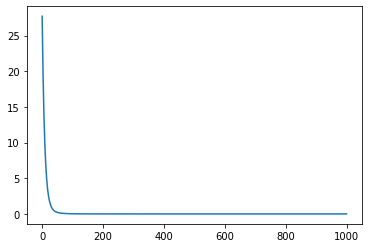

In [ ]:
from matplotlib import pyplot as plt
epoch = range(1000)
plt.plot(epoch, LOSS)

In [ ]:
print(LOSS.size)

AttributeError: ignored